In [1]:
# import libraries
#try:
#  # %tensorflow_version only exists in Colab.
#  !pip install tf-nightly
#except Exception:
#  pass
import tensorflow as tf
import tensorflow
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-06-18 22:34:09--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.05s   

2024-06-18 22:34:09 (7.34 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-06-18 22:34:09--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [3]:
train_data = pd.read_csv(train_file_path, sep='\t', header=None, names=['output', 'texts'], index_col=False)
train_data

,output,texts
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  4179 non-null   int64 
 1   texts   4179 non-null   object
dtypes: int64(1), object(1)
memory usage: 65.4+ KB


In [4]:
train_data['output'] = np.where(train_data['output'] == 'ham', 0, 1)
train_data

,output,texts
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our £250 weekly competition ju...
4177,1,-pls stop bootydelious (32/f) is inviting you ...


In [11]:
max_length = len(train_data['texts'].max())
print(f"# Max length: {max_length} - \'{train_data['texts'].max()}\'")

# Max length: 53 - '… and don‘t worry we‘ll have finished by march … ish!'


In [37]:
val_data = pd.read_csv(test_file_path, sep='\t', header=None, names=['output', 'texts'], index_col=False)
val_data['output'] = np.where(val_data['output'] == 'ham', 0, 1)
val_data

,output,texts
0,0,i am in hospital da. . i will return home in e...
1,0,"not much, just some textin'. how bout you?"
2,0,i probably won't eat at all today. i think i'm...
3,0,don‘t give a flying monkeys wot they think and...
4,0,who are you seeing?
...,...,...
1387,0,true dear..i sat to pray evening and felt so.s...
1388,0,"what will we do in the shower, baby?"
1389,0,where are you ? what are you doing ? are yuou ...
1390,1,ur cash-balance is currently 500 pounds - to m...


In [60]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  1392 non-null   int64 
 1   texts   1392 non-null   object
dtypes: int64(1), object(1)
memory usage: 21.9+ KB


# Other alternatives to phrase vectorizing


In [ ]:
'''
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
phrases = ["This is a sample phrase", "This is another example"]
embeddings = model.encode(phrases)
print(embeddings)'''

In [ ]:
'''
import numpy as np
from gensim.models import KeyedVectors

# Load pre-trained GloVe vectors
word_vectors = KeyedVectors.load_word2vec_format('path/to/glove.6B.100d.txt', binary=False)

def get_phrase_vector(phrase):
    words = phrase.split()
    word_vecs = [word_vectors[word] for word in words if word in word_vectors]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(word_vectors.vector_size)

phrase = "This is a sample phrase"
vector = get_phrase_vector(phrase)
print(vector)
'''

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vectorizer = TfidfVectorizer(max_features=4000)
vectorized_text = vectorizer.fit_transform(train_data['texts'])
x_train = vectorized_text.toarray()

vectorized_text = vectorizer.transform(val_data['texts'])
x_val = vectorized_text.toarray()

In [79]:
from sklearn.preprocessing import LabelBinarizer

# training data x_train and validation data x_val are reshaped to (batch_size, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

x_val = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))


label_binarizer = LabelBinarizer()
y_train = train_data['output']
y_train = label_binarizer.fit_transform(y_train)

y_val = val_data['output']
y_val = label_binarizer.fit_transform(y_val)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4179, 1, 4000), (4179, 1), (1392, 1, 4000), (1392, 1))

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

input_shape = x_train.shape[0]

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(1, x_train.shape[2])))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
66/66 [==============================] - 5s 17ms/step - loss: 0.6114 - accuracy: 0.8653 - val_loss: 0.4121 - val_accuracy: 0.8657
Epoch 2/40
66/66 [==============================] - 1s 9ms/step - loss: 0.2487 - accuracy: 0.8660 - val_loss: 0.1632 - val_accuracy: 0.8678
Epoch 3/40
66/66 [==============================] - 1s 9ms/step - loss: 0.1273 - accuracy: 0.9569 - val_loss: 0.0942 - val_accuracy: 0.9828
Epoch 4/40
66/66 [==============================] - 1s 9ms/step - loss: 0.0528 - accuracy: 0.9916 - val_loss: 0.0453 - val_accuracy: 0.9885
Epoch 5/40
66/66 [==============================] - 1s 8ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 6/40
66/66 [==============================] - 1s 9ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0410 - val_accuracy: 0.9871
Epoch 7/40
66/66 [==============================] - 1s 8ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0411 - val_accuracy: 0.9864
Epoch 8/40
66/66 [=

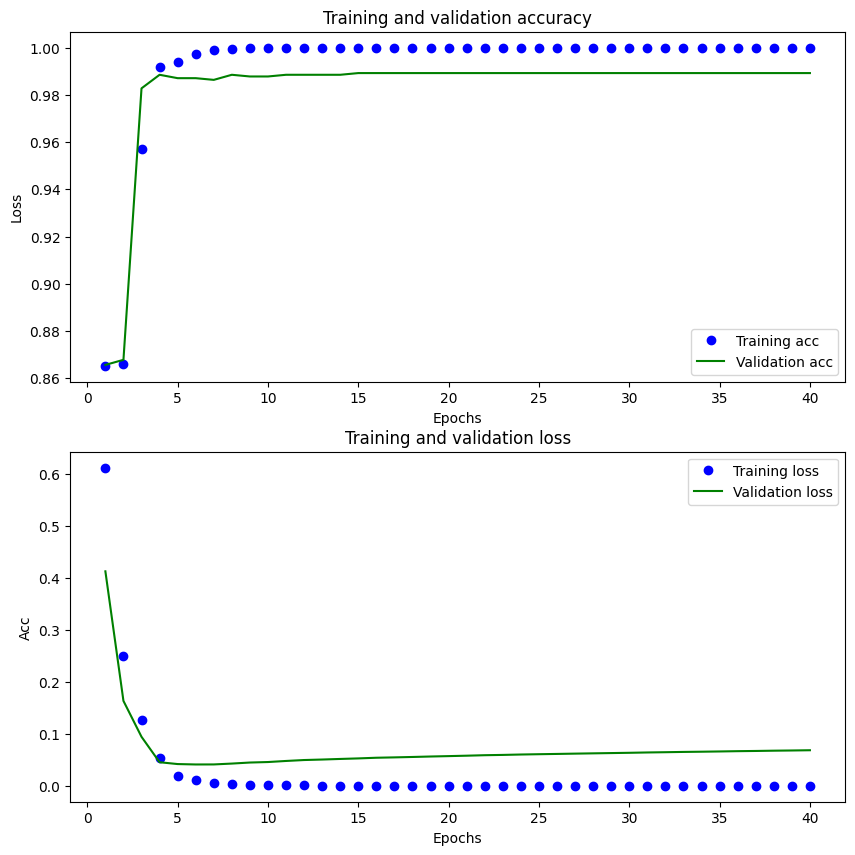

In [81]:
def lossAccValidationGraphs(model_history):
    acc = model_history['accuracy']
    val_acc = model_history['val_accuracy']
    loss = model_history['loss']
    val_loss = model_history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10,10))

    plt.subplot(2,1,1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

lossAccValidationGraphs(history.history)

In [82]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  # encoded_phrase = vectorize_and_pad_phrase([pred_text]) # i cant just use the function as i need to use other function from the vectorizers
  encoded_phrase = vectorizer.transform([pred_text])
  encoded_phrase = encoded_phrase.toarray()
  encoded_phrase = np.reshape(encoded_phrase, (encoded_phrase.shape[0], 1, encoded_phrase.shape[1]))

  prediction = model.predict(encoded_phrase)

  result = 'spam' if prediction[0][0] > 0.5 else 'ham'

  return [float(prediction[0][0]), result]

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 0s 383ms/step
[1.840544250342191e-08, 'ham']


In [83]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    print(prediction, end='')
    if prediction[1] != ans:
      print(" wrong")
      passed = False
    else:
      print(" right")

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 17ms/step
[1.840544250342191e-08, 'ham'] right
1/1 [==============================] - 0s 19ms/step
[0.9987140893936157, 'spam'] right
1/1 [==============================] - 0s 17ms/step
[1.2029196215512794e-11, 'ham'] right
1/1 [==============================] - 0s 19ms/step
[0.9999994039535522, 'spam'] right
1/1 [==============================] - 0s 16ms/step
[1.0, 'spam'] right
1/1 [==============================] - 0s 17ms/step
[9.748507636686554e-07, 'ham'] right
1/1 [==============================] - 0s 16ms/step
[5.991915297265393e-11, 'ham'] right
You passed the challenge. Great job!
